# Attention

- Encoder Decoder Attention
- Self Attention
- Bidirectional Attention
- Multi-head Attentenion


## Encoder Decoder Attention (Dot-product Attention)

In neural machine translation, the phrase "Hello, how are you?", and the Italian equivalent "Ciao, come va?" should share a similar matrix representation.

when we iterate through each word, and compare the individual vectors between the two sequences - we should find that words such as "Hello" and "Ciao" have higher similarity than words that have different meaning such as "are" and "Ciao".

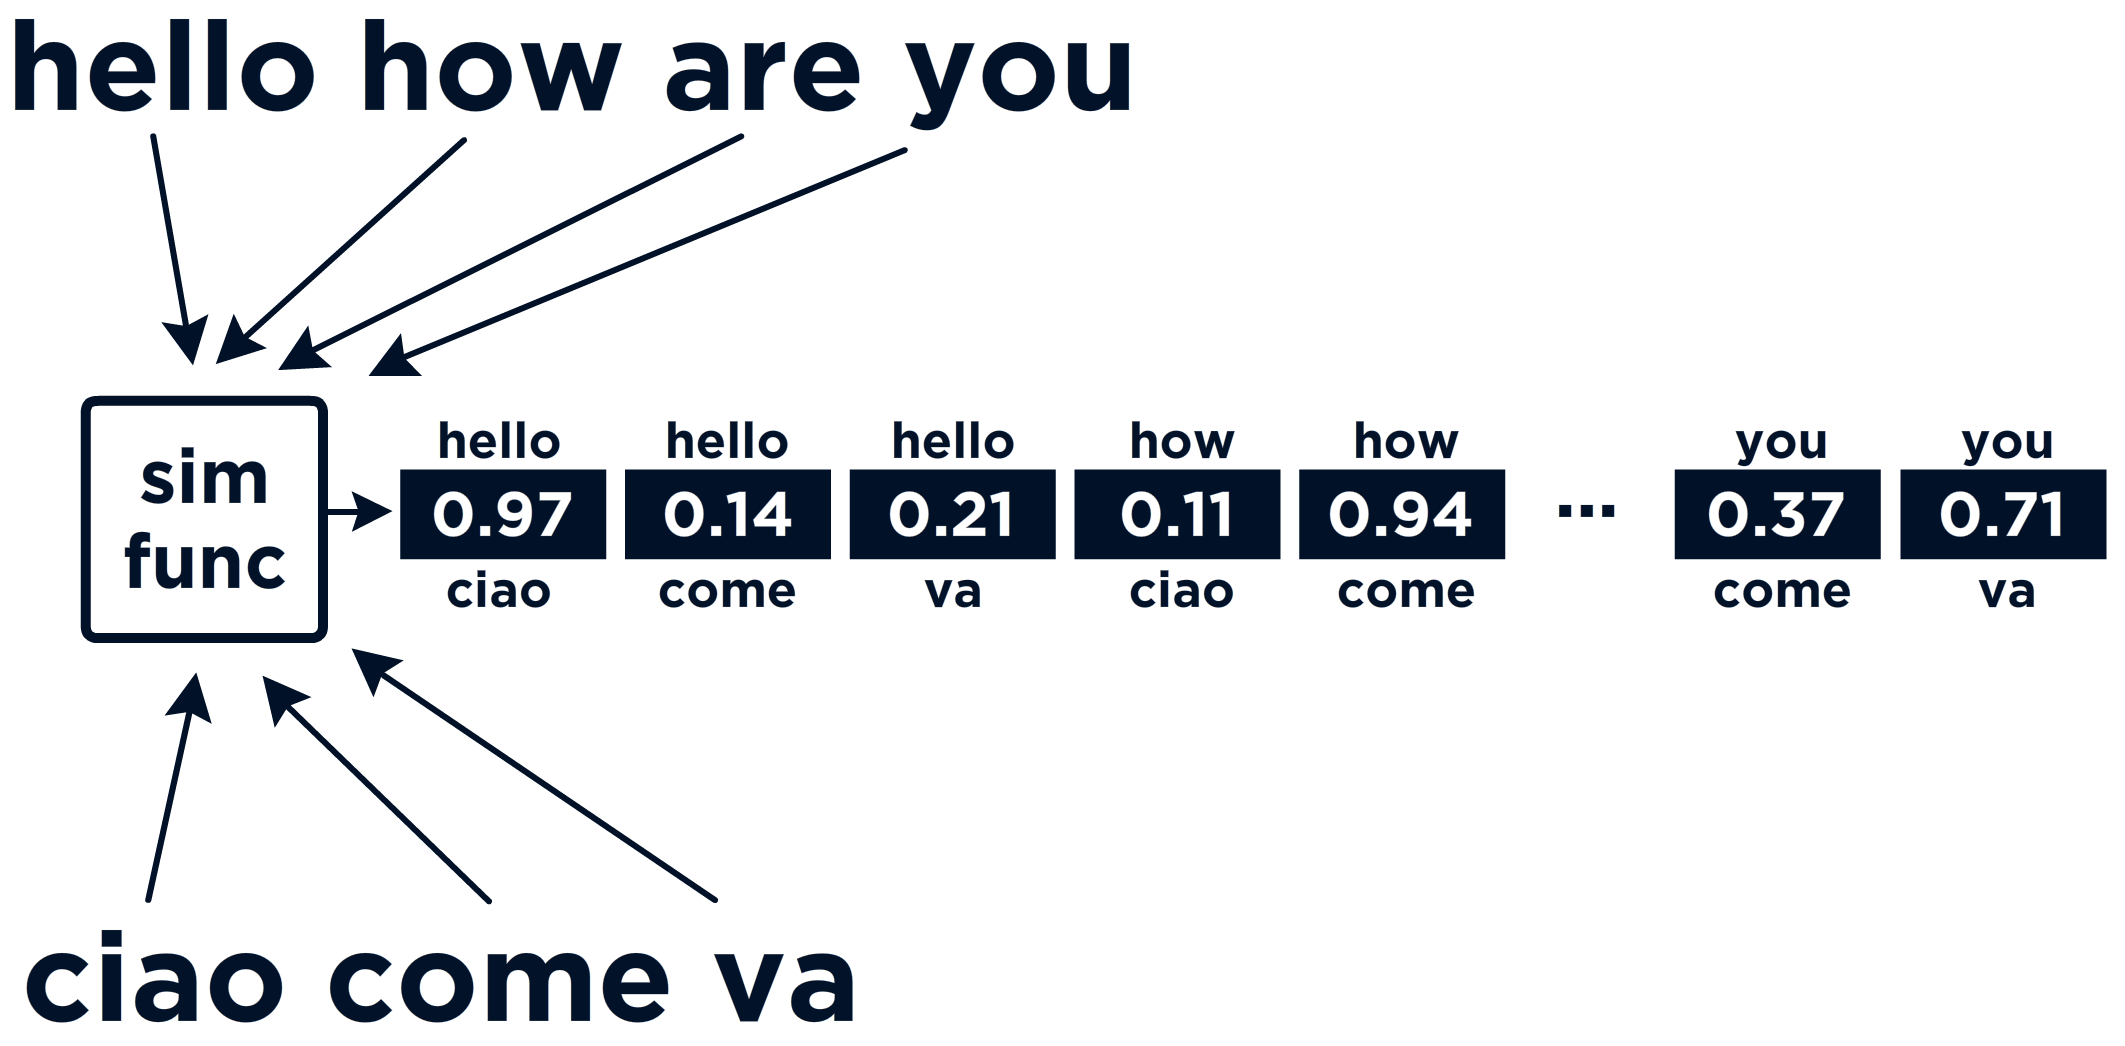

Mapping between word attentions better using a heatmap

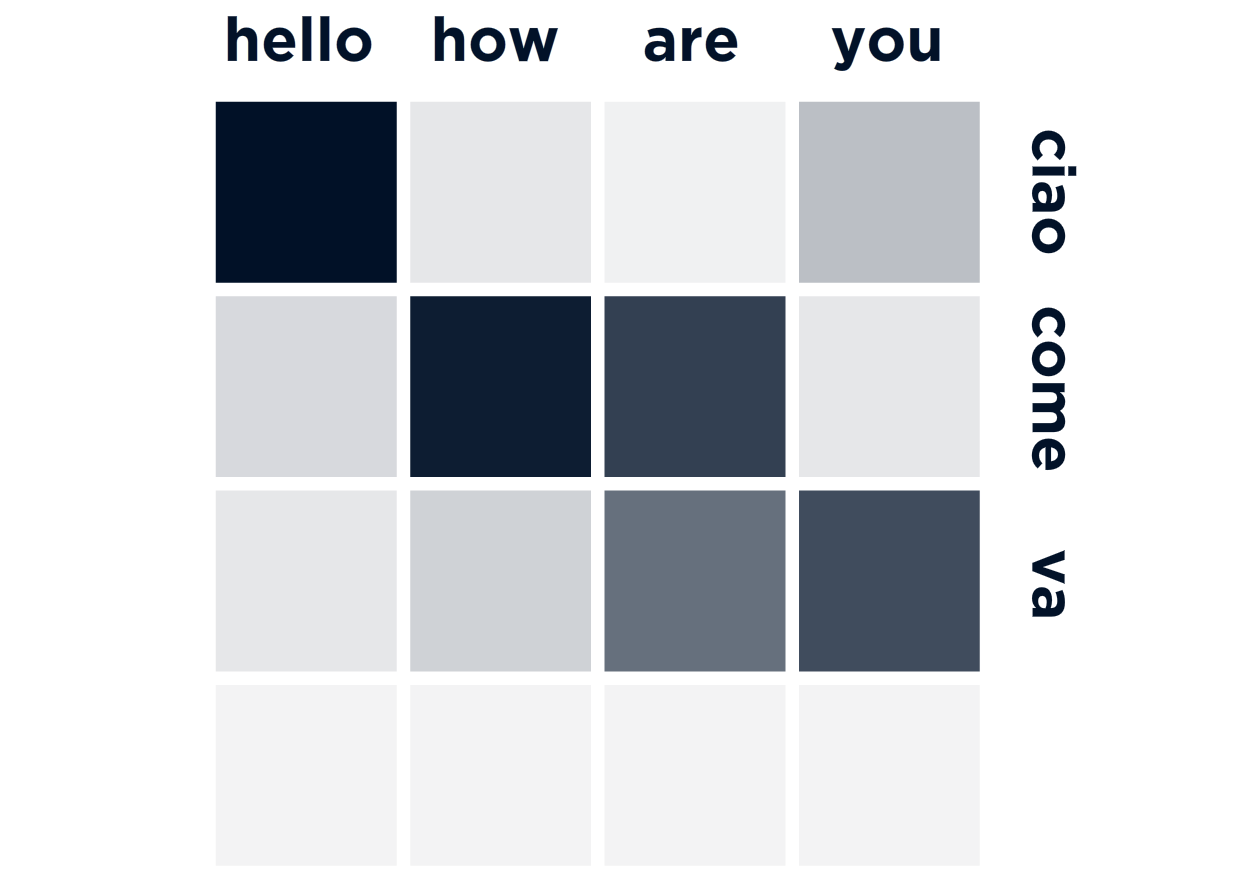

### Calculating Alignment
This similarity between word vectors is known as 'alignment', and we calculate alignment between two vectors using the dot product.

Let's imagine rather than a high-dimensional vector (as we would usually expect with word vectors), we have simple, three-dimensional vectors which can be visualized. We have three of these vectors each representing a word:

In [1]:
hello = [0.71, 0.14, 0.51]
hi = [0.69, 0.15, 0.48]
tomato = [0.16, 0.59, 0.49]

We can plot each of these onto a 3D chart:

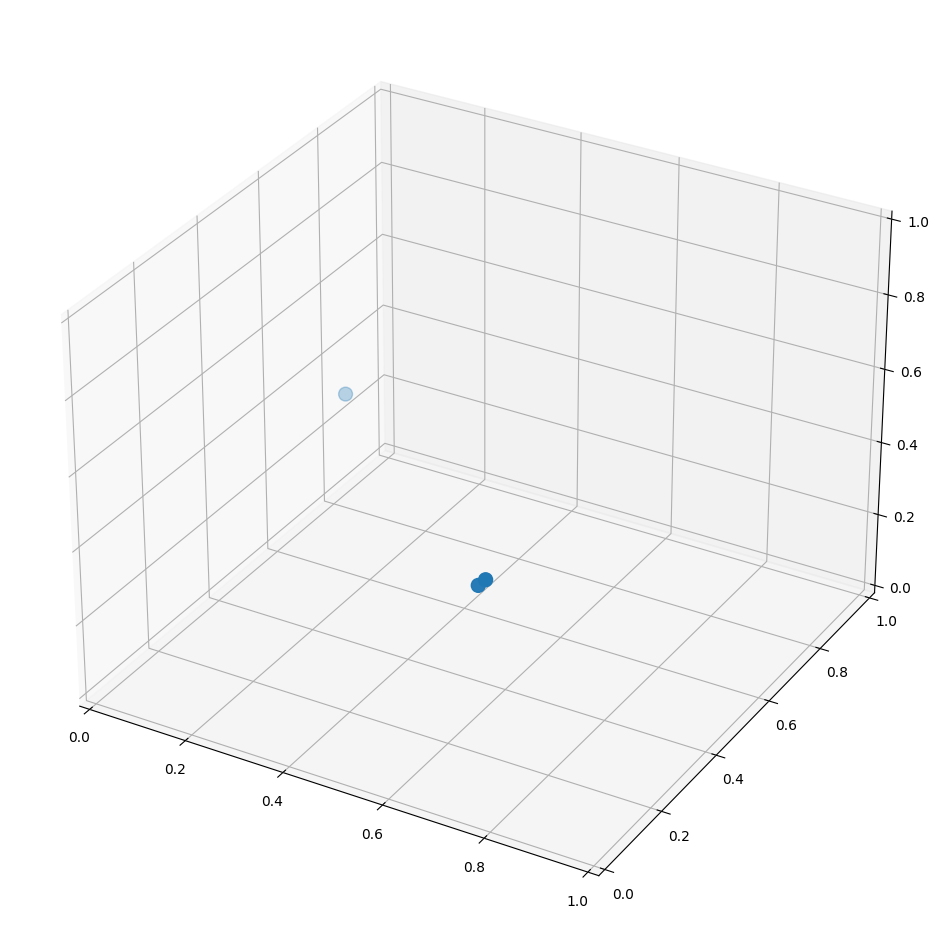

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(projection='3d')

xs = [hello[0], hi[0], tomato[0]]
ys = [hello[1], hi[1], tomato[1]]
zs = [hello[2], hi[2], tomato[2]]

ax.scatter(xs, ys, zs, s=100)

ax.set_xlim((0, 1))
ax.set_ylim((0, 1))
ax.set_zlim((0, 1))

plt.show()

In [8]:
import numpy as np

a = np.array(hello)
b = np.array(hi)
c = np.array(tomato)

np.matmul(a, b.T) # or np.dot(a, b) ## same thing

0.7556999999999999

We can see a high allignment between "hi" and "hello"

In [9]:
np.matmul(a, c.T)

0.4461

We can see a lower allignment between Hello and Tomato

### Queries, Keys, and Values

In dot-product attention, three tensors are compared: query Q, key K, and value V. K and V, typically identical, originate from English text; Q comes from Italian text. Alignment between English (K) and Italian (Q) sequences is computed using dot product. Softmax is then applied to the dot product alignment, turning it into probabilities. These probabilities are used to weigh V, resulting in the attention tensor z.

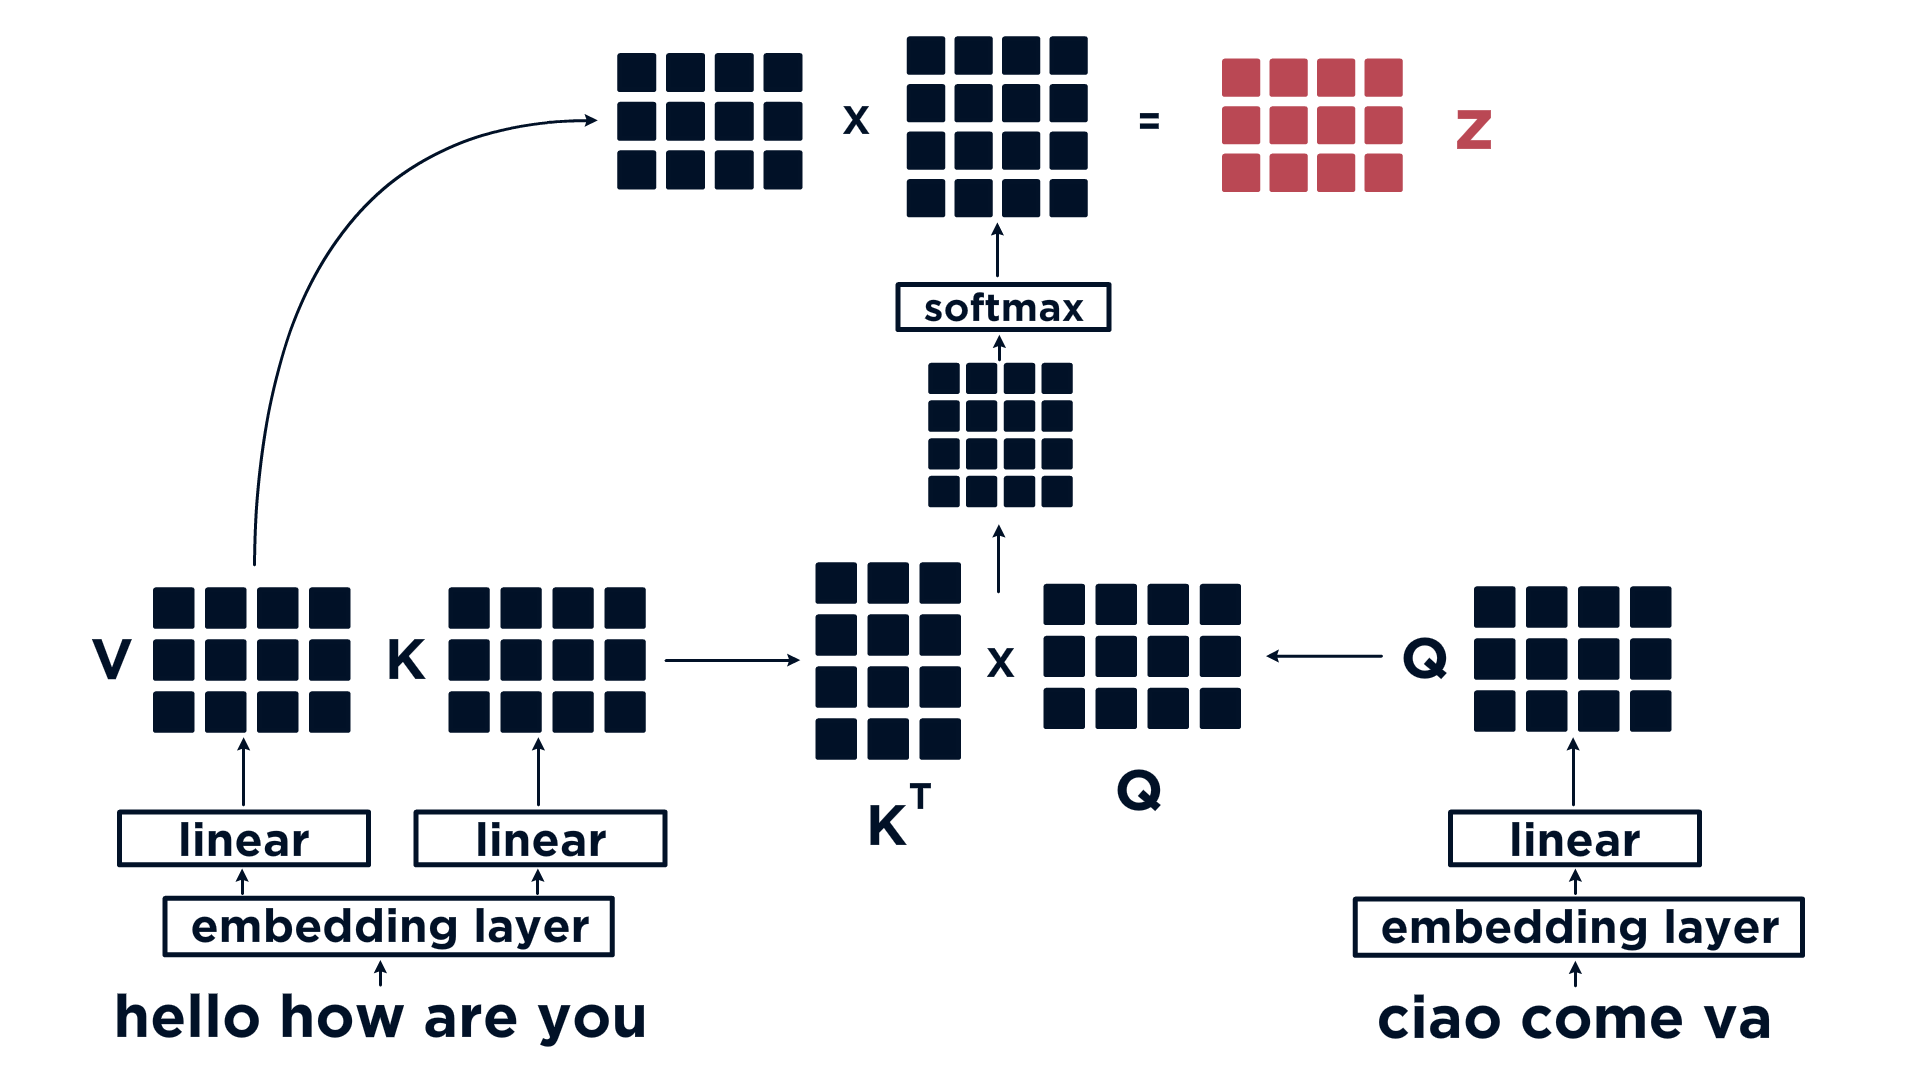

## Self Attention

Dot-product attention calculates alignment between word vectors from separate sequences, useful for translation. In self-attention, words are compared to prior words in the same sequence, seen in text generation and summarization in transformer models. Similar to dot-product attention, self-attention computes dot-product, but using Q and K from the same sequence. After dot-product calculation, a mask excludes future words, yielding past word dot-products. Softmax is applied, and the outcome is multiplied by V to obtain attention Z.

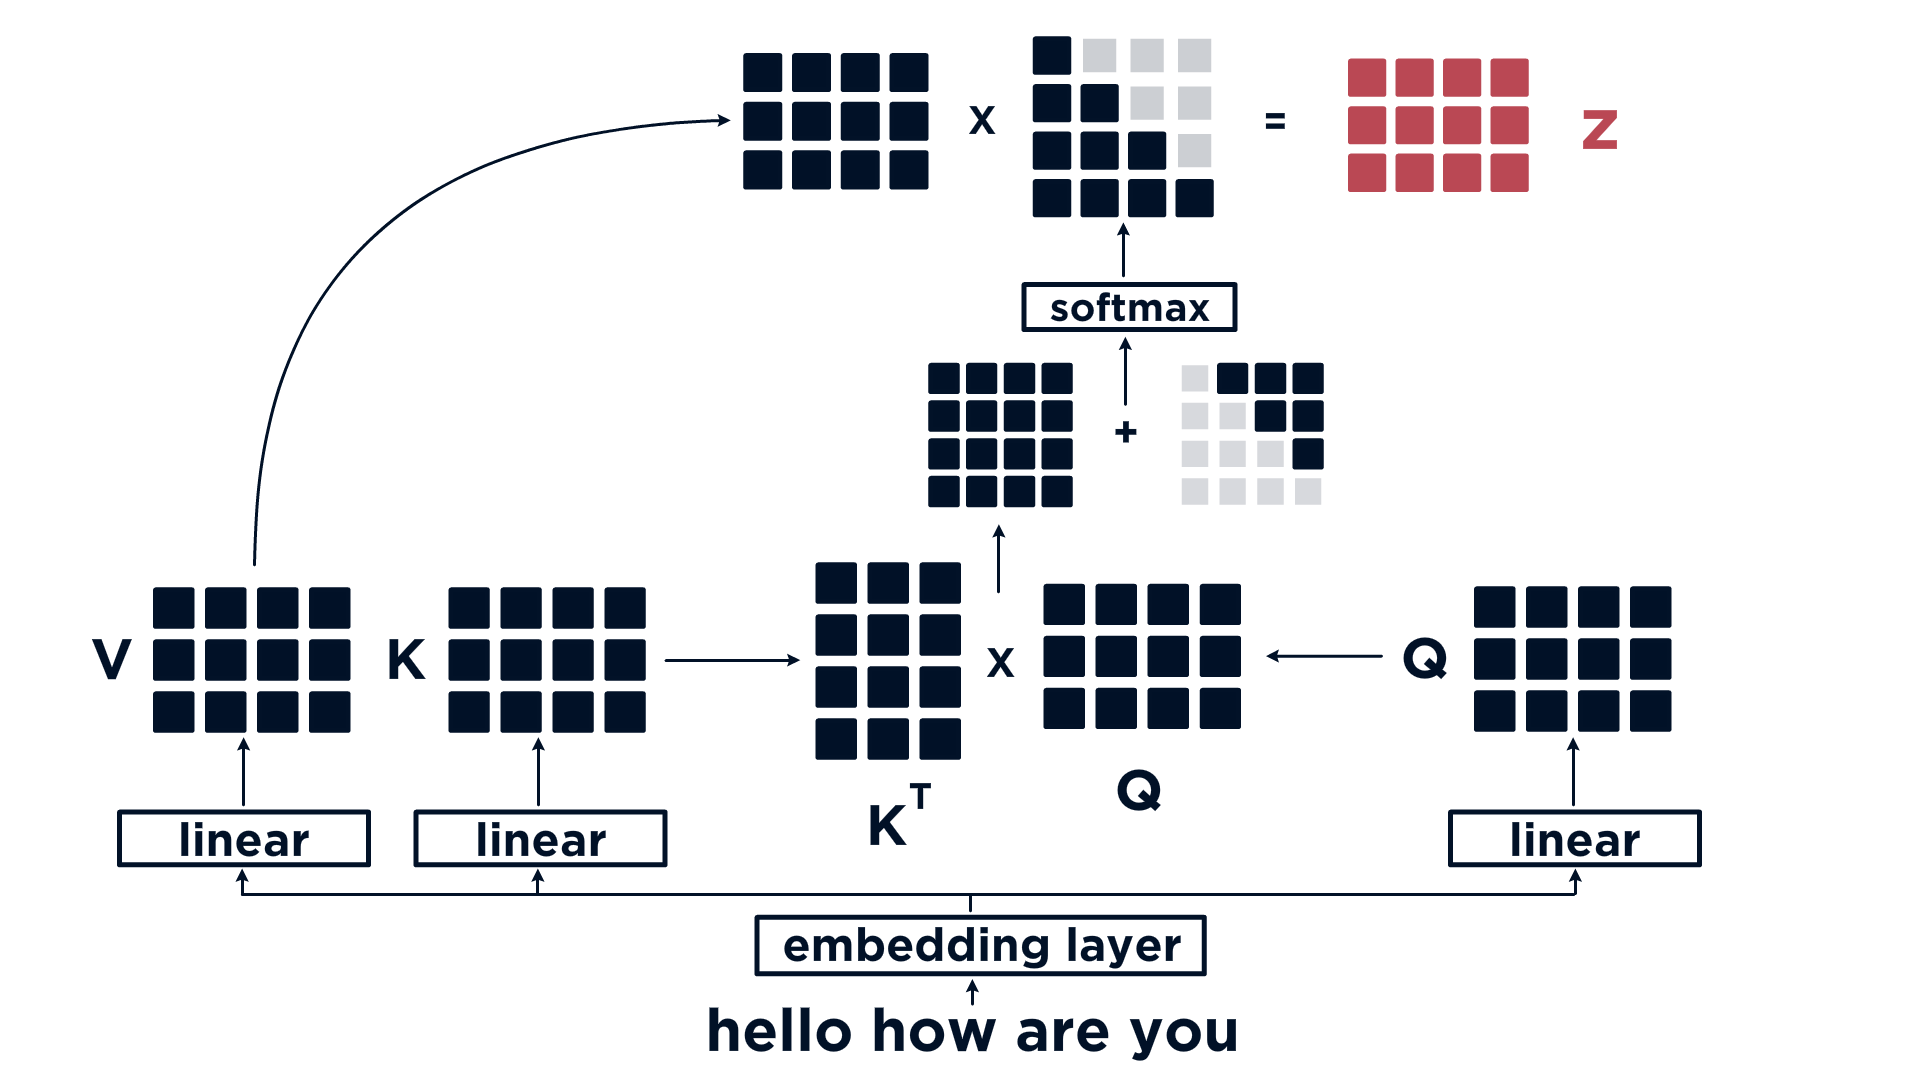

##Bi-directional Attention

We've explored dot-product attention, self-attention, and bidirectional attention. While dot-product compares sequences, self-attention looks at prior tokens within one sequence. Bidirectional attention considers tokens in both directions without masking, akin to self-attention but allowing mapping between all words in the sequence. This is crucial for masked language modeling, as seen in BERT (Bidirectional Encoder Representations from Transformers). Bidirectional self-attention corresponds to BERT's bidirectional encoder.

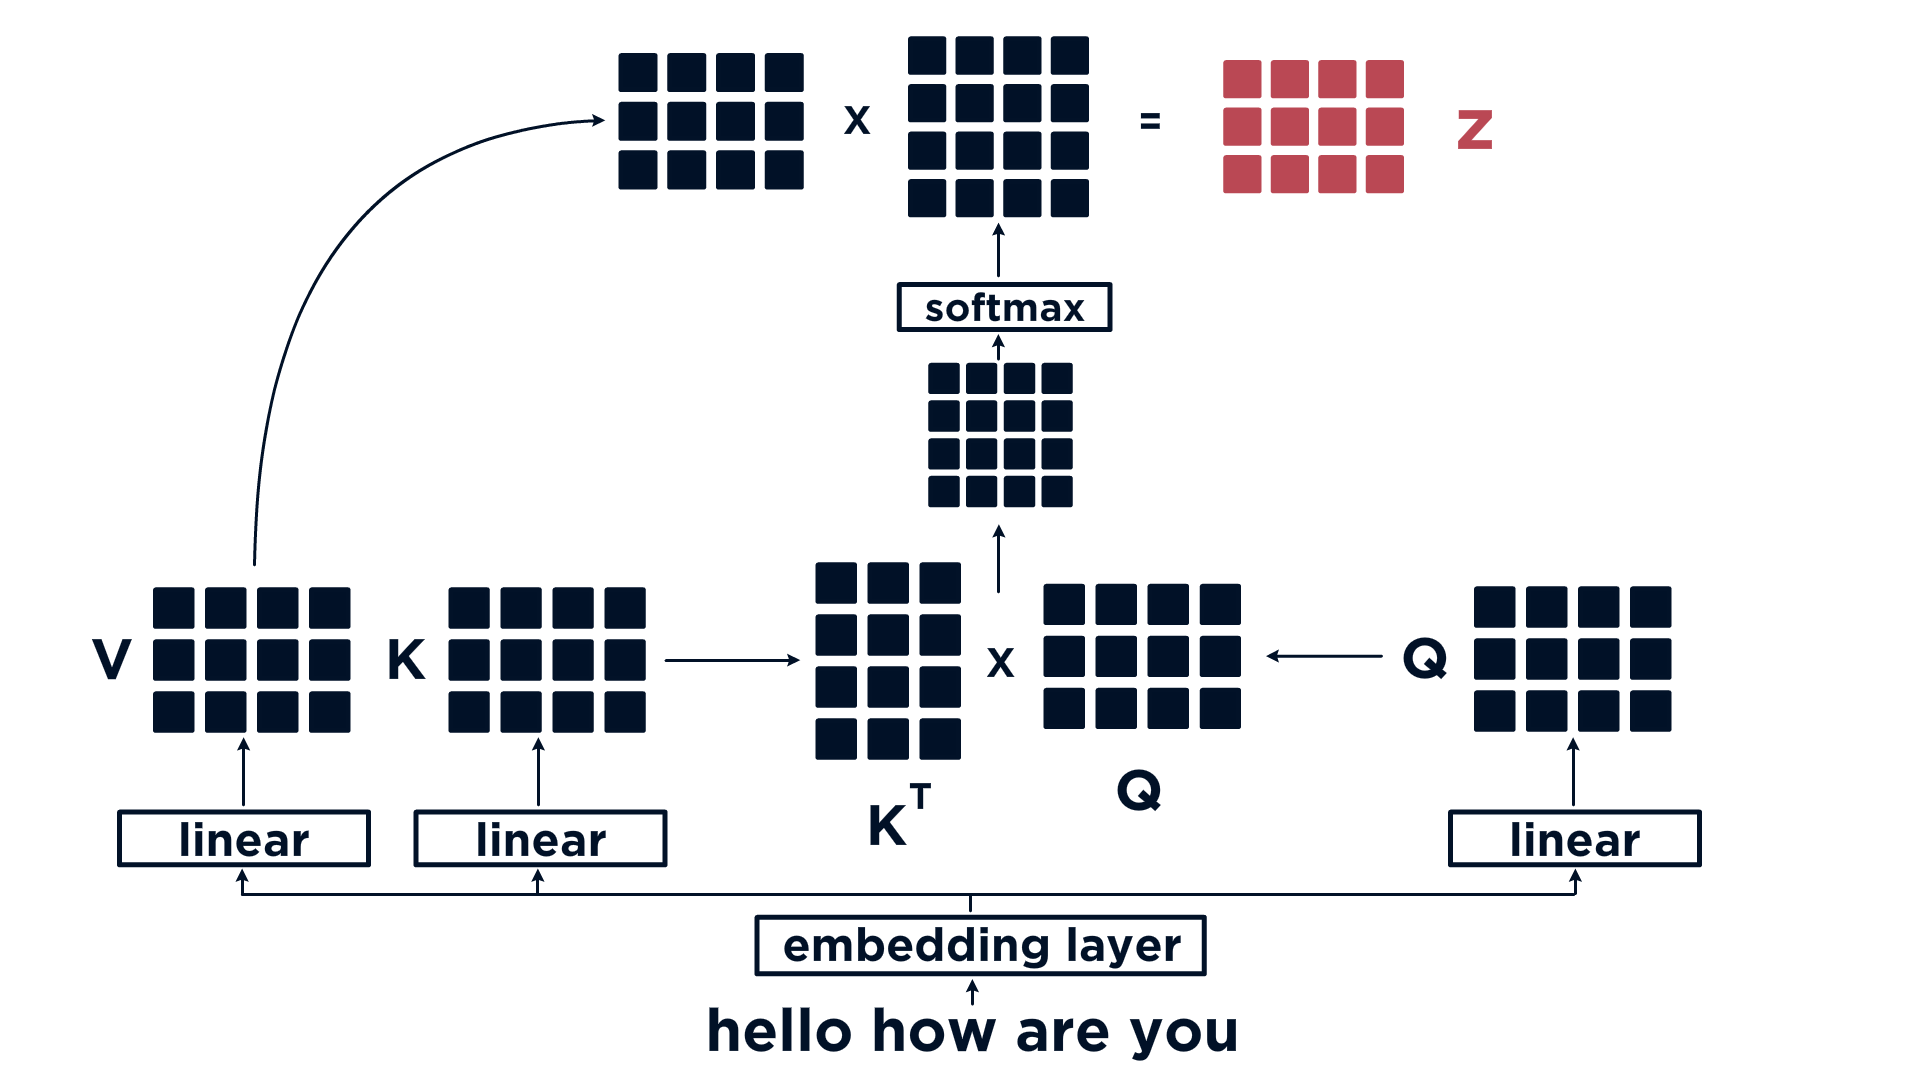

## Multihead Attention

Multihead attention enables the creation of multiple attention representations between words. Instead of a single attention calculation, it's done multiple times. The outcomes are combined and processed through a linear layer in transformer models. This configuration is illustrated in the provided image.

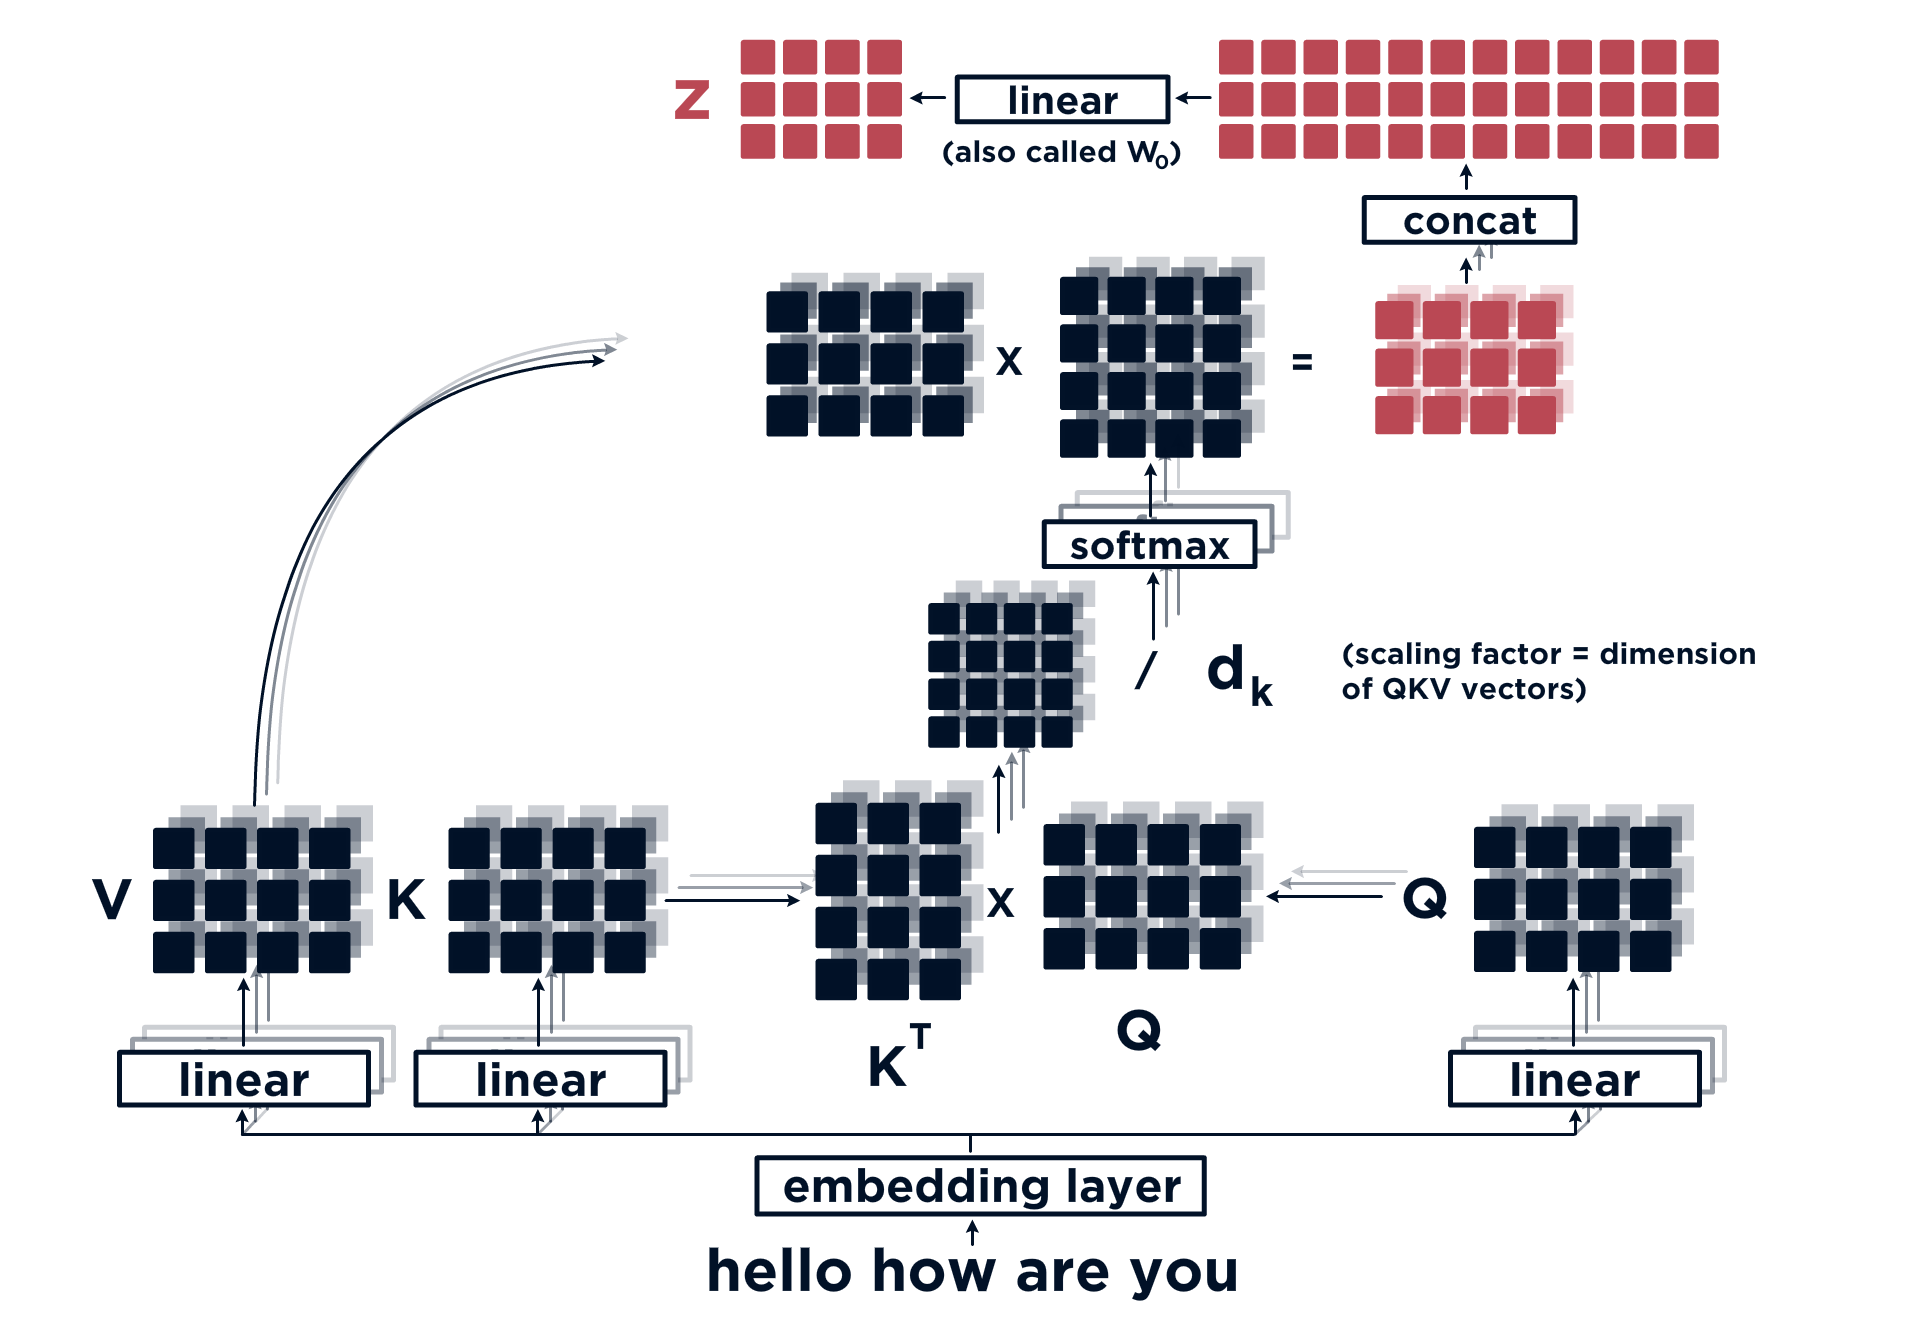